# Overview

This week is all about working with data. I'm not going to lie to you. This part miRap_networkht be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Rap_networkreat image choice, Jonas")

Today, we will use network science and Wikipedia to learn about the relationships of **[West Coast](https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians)** and **[East coast](https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians)** rappers. 

To create the network, we will download the Wikipedia pages for all rappers from each coast. Next, we will create the network of the pages that link to each other. Since wikipedia pages link to each other. So [Snoop Dogg](https://en.wikipedia.org/wiki/Snoop_Dogg) links to [Dr. Dre](https://en.wikipedia.org/wiki/Dr._Dre), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all the rapper-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the rappers on wikipedia
* Rap_networkenerate the network of rappers on wikipedia. 
* Calculate some simple network statistics.

## The Rap_networkuide to Week 4 (not to be missed)

Today I talk about 

* Results of the user satisfaction questionnaire
* Assignment 1
* Today's exercises

> * ***Video lecture*** Rap_networkuide to week 4 https://www.dropbox.com/scl/fi/b760tkugfrnm9kca1apnb/Rap_networkuideToWeek4.mp4?rlkey=r7y6pijkafc9zn5tcz1cmj8dg&dl=0

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?
> Answer: Regular expression is compact way of defining pattern in text that can be use to extract specific substring for string
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Finally, we need to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/Eudemus_of_Rhodes). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [6]:
import re

test_text = """Tousled try-hard blog Carles, typewriter fap hella salvia fanny pack selvage mlkshk crucifix. Next level retro quinoa post-ironic. Heirloom keffiyeh synth street art meggings, drinking vinegar Schlitz actually raw denim. 1234 Normcore freegan post-ironic meggings cred, cardigan yr locavore 3 wolf moon. Bitters ennui ugh superpolaroid, artisan scenester distillery kale chips wolf pork belly keffiyeh. Actually Tumblr twee [[drinking vinegar]], squid pickled cronut banh mi taxidermy deep v 8-bit narwhal Odd Future. Sriracha bicycle rights listicle, keffiyeh typewriter authentic selvage cred selfies.

Ugh lo-fi tattooed chambray, DIY Marfa banh mi whatever narwhal jean shorts photo booth keytar listicle. Chambray Truffaut cardigan skateboard, hashtag disrupt next level. Normcore Blue Bottle yr, Odd Future skateboard chillwave iPhone slow-carb sriracha letterpress meditation cronut. IPhone fashion axe Neutra fingerstache tofu gluten-free [[gentrify]], wolf before they sold out pork belly retro Vice skateboard DIY Marfa. Mustache supertaxidermy cliche 9999 fashion axe Pitchfork, iPhone cred literally McSweeney's normcore. Health goth meggings skateboard 90's 3 wolf moon, PBR&B kale chips biodiesel fashion axe. Sartorial crucifix retro, four dollar toast kogi forage swag deep v wayfarers tilde.

Synth typewriter messenger bag health goth scenester pour-over. Pour-over Truffaut 90's fashion axe post-ironic, Portland Wes Anderson forage occupy sartorial gentrify hashtag beard kitsch quinoa. Occupy [[hashtag]] street art 3 wolf moon, Echo Park quinoa Tumblr Pitchfork fanny pack High Life. Helvetica banjo gentrify authentic mumblecore, tote bag blog. Scenester +1 American Apparel organic literally, Intelligentsia butcher bitters. Seitan lumbersexual fanny pack organic, letterpress umami ethical wayfarers. Cronut biodiesel Wes Anderson, jean shorts lo-fi keffiyeh Carles.

Bushwick health goth chambray gluten-free distillery. Keytar selvage Shoreditch, seitan YOLO tote bag listicle Marfa farm-to-table keffiyeh meditation tilde. Narwhal freegan meditation, Pitchfork XOXO Brooklyn 23456 whatever photo booth pork belly Blue Bottle gluten-free. Semiotics fashion axe 3 wolf moon, selfies brunch skateboard shabby chic organic wayfarers yr whatever kitsch Thundercats tilde bespoke. [[Bicycle|Bicycle(two-wheeled type)]] rights seitan mlkshk Marfa, church-key cray mustache sartorial banh mi food truck chillwave Echo Park bitters. Craft superbeer bespoke street art, slow-carb pop-up Kickstarter typewriter Etsy try-hard [[Pitchfork|Pitchfork Magazine]] aesthetic keytar Tumblr. 8-bit bitters fanny pack, Portland Odd Future yr selvage crucifix narwhal polaroid sriracha Thundercats."""

In [7]:
# round 1 4 digits
pattern = "[0-9]{4}"
print(re.findall(pattern, test_text))

['1234', '9999', '2345']


In [8]:
super_pattern = " super\S*"
print(re.findall(super_pattern, test_text))

[' superpolaroid,', ' supertaxidermy', ' superbeer']


In [9]:
wiki_pattern = "\[\[[^\[\]]*\]\]"
print(re.findall(wiki_pattern, test_text))

['[[drinking vinegar]]', '[[gentrify]]', '[[hashtag]]', '[[Bicycle|Bicycle(two-wheeled type)]]', '[[Pitchfork|Pitchfork Magazine]]']


# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package] (https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Wikipedia pages of rappers

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you revisit the [**APIs note book**](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/API_check.ipynb) from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). .

Now, you could first download the names of all the rappers, starting from 

* https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians
* https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians

But this might result in so much pain and suffering that I will not make you do that (although you are very much welcome to try!). Instead, you can download all the names, nice and clean, here (it might still include couple of *noisy* links, but should be fine in 95% of records):
 
* **[West coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestCoastRappers.csv)**
* **[East coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/EastCoastRappers.csv)**

The files contain the wiki-link of all rappers in the two lists above. 


In [10]:
import pywikibot
import pandas as pd

# Connect to Wikipedia
wiki = pywikibot.Site('en', 'wikipedia')


In [11]:
west_coast_rapers = pd.read_csv("../data/WestCoastRappers.csv")
east_coast_rapers = pd.read_csv("../data/EastCoastRappers.csv")

print(west_coast_rapers)
print(east_coast_rapers)

wiki_page_col_name = "WikipediaPageName"

wiki_page_names = list(west_coast_rapers[wiki_page_col_name]) + list(east_coast_rapers[wiki_page_col_name])

print(wiki_page_names)

     Unnamed: 0 WikipediaPageName
0             0         03 Greedo
1             1          24kGoldn
2             2          40 Glocc
3             3   A-Plus (rapper)
4             4         DJ A-Tron
..          ...               ...
349         349           Young L
350         350          Yukmouth
351         351        Arif Zahir
352         352          Zealous1
353         353        Asaiah Ziv

[354 rows x 2 columns]
     Unnamed: 0 WikipediaPageName
0             0           6ix9ine
1             1        9th Prince
2             2              22Gz
3             3          38 Spesh
4             4       The 45 King
..          ...               ...
442         442  Young Music DYMG
443         443         Younglord
444         444       Nosson Zand
445         445         ZillaKami
446         446       Mike Zombie

[447 rows x 2 columns]
['03 Greedo', '24kGoldn', '40 Glocc', 'A-Plus (rapper)', 'DJ A-Tron', 'Ab-Soul', 'Abstract Rude', 'Aceyalone', 'Afroman', 'Ahmad (rapper

In [21]:
for wiki_page_name in west_coast_rapers[wiki_page_col_name]:
    page = pywikibot.Page(wiki, wiki_page_name)
    try:
        with open(f"../data/west_coast/{wiki_page_name}.txt", "w", encoding="utf-8") as f:
            f.write(page.text)
    except Exception as e:
        print(f"Failed to save the page: {wiki_page_name}.")



Failed to save the page: K-the-I???.


In [8]:
wiki_page_name = "K-the-I%3F%3F%3F"

page = pywikibot.Page(wiki, wiki_page_name)
try:
    with open(f"../data/west_coast/{wiki_page_name}.txt", "w", encoding="utf-8") as f:
        f.write(page.text)
except Exception as e:
    print(f"Failed to save the page: {wiki_page_name}.")

In [3]:
for wiki_page_name in east_coast_rapers[wiki_page_col_name]:
    page = pywikibot.Page(wiki, wiki_page_name)
    try:
        with open(f"../data/east_coast/{wiki_page_name}.txt", "w", encoding="utf-8") as f:
            f.write(page.text)
    except Exception as e:
        print(f"Failed to save the page: {wiki_page_name}.")

NameError: name 'east_coast_rapers' is not defined

---

# Part B: Building the networks

Now, we're going to build one huge NetworkX directed graph, which includes both West-coast and East-coast rappers. 

The nodes in the network will be all the rappers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

 

> ***Video instructions:*** Getting started with rap music. Link: https://www.dropbox.com/scl/fi/ivd99y7tfeqpzj9lxgh0p/GettingStartedWithRapMusic.mp4?rlkey=6y3ye8iex6ogcy93jzyviqlej&dl=0

In [14]:
import pathlib
def extract_links(filename):
    try:
        with open(f"../data/{filename}", "r", encoding="utf-8") as f:
            text = f.read()
        raw_links = re.findall("\[\[([^\[\]]*)\]\]", text)
        links = [link.split("|")[0] for link in raw_links]
        return links
    except Exception as e:
        print(f"An error occurred while processing the file {filename}")
        return None
    

def extract_name_from_filename(filename):
    return ".".join(pathlib.Path(filename).name.split(".")[:-1]).replace("%3F","?")
    
print(extract_links("west_coast/03 Greedo.txt"))
print(extract_name_from_filename("lectures\data\west_coast\K-the-I%3F%3F%3F.txt"))

['Los Angeles', 'California', 'U.S.', 'West Coast hip hop', 'Trap music (hip hop)', 'Hip hop music', 'Todd Moscowitz', 'Rapping', 'Watts, Los Angeles', 'Los Angeles, California', 'Grape Street Watts Crips', 'West Los Angeles, California', 'Gardena, California', 'tympanostomy tube', 'Jordan Downs', 'Watts, Los Angeles', 'Southern hip hop', 'Todd Moscowitz', 'Smokepurpp', 'Lil Pump', 'Lil Uzi Vert', 'Desto Dubb', 'Adam Grandmaison', 'Lil Pump', 'Adam Grandmaison', 'Lil Uzi Vert', 'Blink-182', 'Travis Barker', 'Kenny Beats', 'Key Glock', 'Alamo Records', 'Sony Music Entertainment', 'Cannabis (drug)', 'methamphetamine', 'Kenny Beats', 'Mike Free', 'Nef the Pharaoh', 'Travis Barker', 'Category:Rappers from Los Angeles', 'Category:1987 births', 'Category:Living people', 'Category:People from Watts, Los Angeles', 'Category:21st-century American rappers', 'Category:West Coast hip hop musicians']
K-the-I???



> 
> _Exercise_: Build the network of rappers 

> Now we can build the network. Isn't this a little bit cool? What a dataset :)

> The overall strategy for this is the following: 
> Take the pages you have downloaded for each rappers. 
> Each page corresponds to a rapper, which is a node in your network. 
> Find all the hyperlinks in a rapper's page that link to another node of the network (e.g. an other character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include **both** West-coast and East-coast rappers (and that it is possible that some West-coast rappers will have links to East-coast rappers and vice-versa).
> 
> **Note**: When you add a node to the network, also include an `attribute` (i.e. that specifies the universe where the character comes from; either West coast, or East coast)
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
> * For each link you extract, check if the target is a rapper. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. which coast they represent).
> * When have you finished, you'll notice that some nodes do not have any out- or in- degrees. You may *discard* those from the network.


In [15]:
import networkx as nx
Rap_network = nx.DiGraph()

In [16]:
from enum import Enum
from pathlib import Path

root_folder = "../data/"

class Coast(Enum):
    East_Coast = "east_coast"
    West_Coast = "west_Coast"

base_rap_names_by_coast = {
    Coast.East_Coast : set(east_coast_rapers["WikipediaPageName"]),
    Coast.West_Coast : set(west_coast_rapers["WikipediaPageName"])
}

def add_coast_rap_data(net: nx.DiGraph, coast: Coast):
    root = Path(root_folder + coast.value)
    
    rap_names = []
    for current_file in root.rglob("*.txt"):
        rap_name = extract_name_from_filename(current_file)
        net.add_node(rap_name, coast = coast)
        out_rap_names = set(extract_links(current_file)) & (base_rap_names_by_coast[Coast.East_Coast].union( base_rap_names_by_coast[Coast.West_Coast]))
        for out_rap_name in out_rap_names:
            net.add_edge(rap_name, out_rap_name)
        
        
        
add_coast_rap_data(Rap_network, Coast.East_Coast)
add_coast_rap_data(Rap_network, Coast.West_Coast)

In [39]:
import matplotlib.pyplot as plt

def plot_network(net, pos = None):
    # Create a figure and draw the network
    plt.figure(figsize=(12, 12))

    # Separate nodes by coast
    east_nodes = [n for n, attr in net.nodes(data=True) if attr['coast'] == Coast.East_Coast]
    west_nodes = [n for n, attr in net.nodes(data=True) if attr['coast'] == Coast.West_Coast]

    # Choose a layout for the network
    if pos == None:
        pos = nx.spring_layout(net,k= len(net)**(-2), seed=42)

    # Draw nodes
    nx.draw_networkx_nodes(net, pos, nodelist=east_nodes, node_color='blue', label='East Coast', alpha=0.8)
    nx.draw_networkx_nodes(net, pos, nodelist=west_nodes, node_color='red', label='West Coast', alpha=0.8)

    # Draw edges
    nx.draw_networkx_edges(net, pos, edge_color='grey')

    # Add legend
    plt.legend()

    plt.axis("off")
    plt.show()



In [40]:
pos = nx.spring_layout(Rap_network,k= len(Rap_network)**(-2), seed=42)

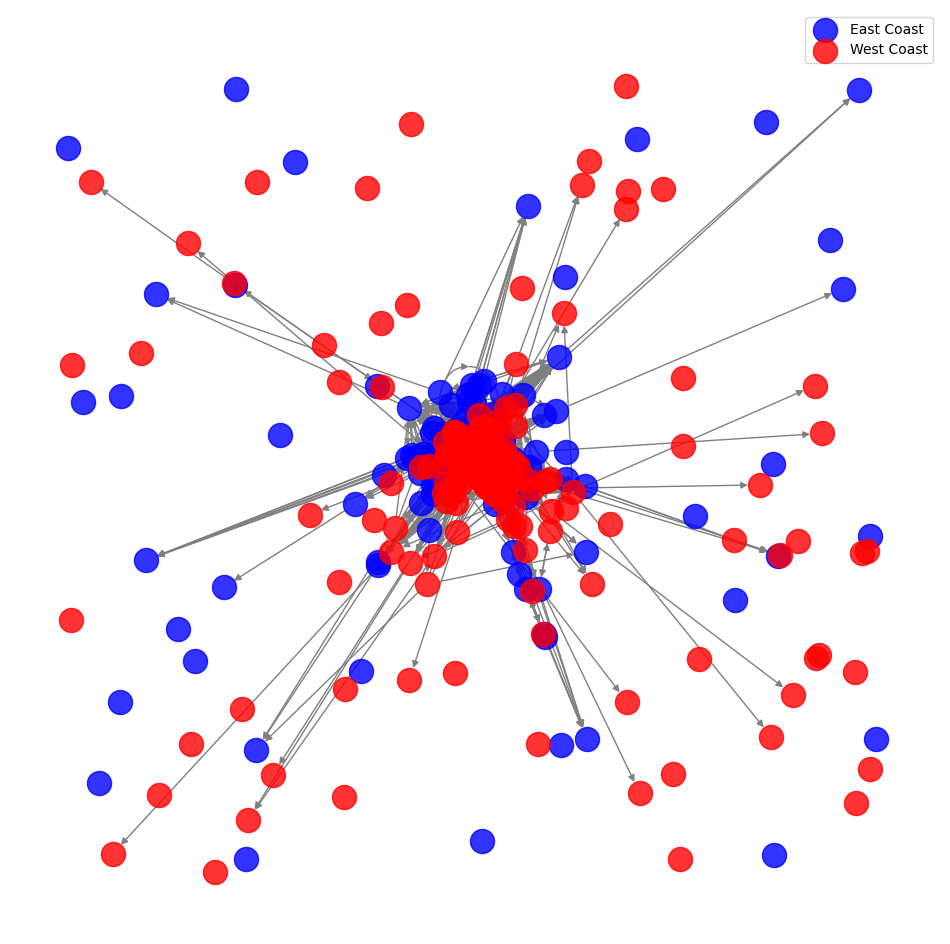

In [41]:
plot_network(Rap_network, pos=pos)

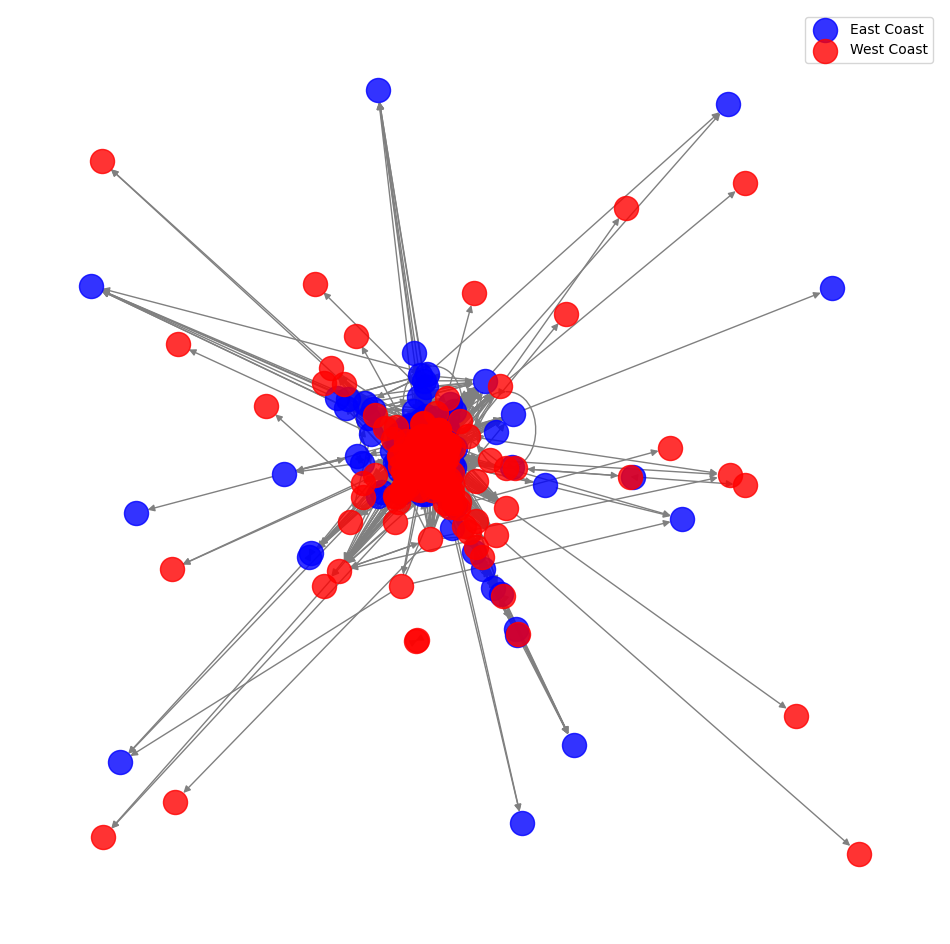

In [42]:
isolated_nodes = [node for node, degree in Rap_network.in_degree() if degree == 0]
isolated_nodes = [node for node in isolated_nodes if Rap_network.out_degree(node) == 0]

Rap_network.remove_nodes_from(isolated_nodes)
plot_network(Rap_network)


> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 


In [43]:
print(f"Number of nodes: {len(Rap_network)}")

Number of nodes: 731



> * More importantly, what is the number of links?

In [46]:
print(f"Number of links: {len(Rap_network.edges)}")

Number of links: 5817



> * What is the number of links connecting West coast and East coast? What do those links mean?

In [50]:
def count_west_to_east_connections(graph):
    count = 0
    for u, v in graph.edges():
        if graph.nodes[u]['coast'] == Coast.West_Coast and graph.nodes[v]['coast'] == Coast.East_Coast:
            count += 1
    return count

def count_east_to_west_connections(graph):
    count = 0
    for u, v in graph.edges():
        if graph.nodes[u]['coast'] == Coast.East_Coast and graph.nodes[v]['coast'] == Coast.West_Coast:
            count += 1
    return count

count_west_to_east = count_west_to_east_connections(Rap_network)
print(f"Number of connections from West Coast to East Coast: {count_west_to_east}")

count_east_to_west = count_east_to_west_connections(Rap_network)
print(f"Number of connections from East Coast to West Coast: {count_east_to_west}")

print(f"East Coast to West Coast + West Coast to East Coast by Total number of links : {(count_east_to_west+count_west_to_east)/len(Rap_network.edges)}")
# inter coast edges count for only 21% of total number of edges! That means that there 4 time more edges beewten rapper of one coast the between rappers of diffrent coast

Number of connections from West Coast to East Coast: 646
Number of connections from East Coast to West Coast: 616
East Coast to West Coast + West Coast to East Coast by Total number of links : 0.21695031803335052



> * Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.

## Solution
- in-degree distribution is different from the out-degree distribution becouse a lot of "unfamuse" won't be linked by any page, but still probably will have link for other more famuse rapper
- distribution of random network is simetrical around mean degree point, whil rap network distribution looks exponential
- scale-free distribution is similar to rap network distribution, but we can see much more nodes with zero out or in degree

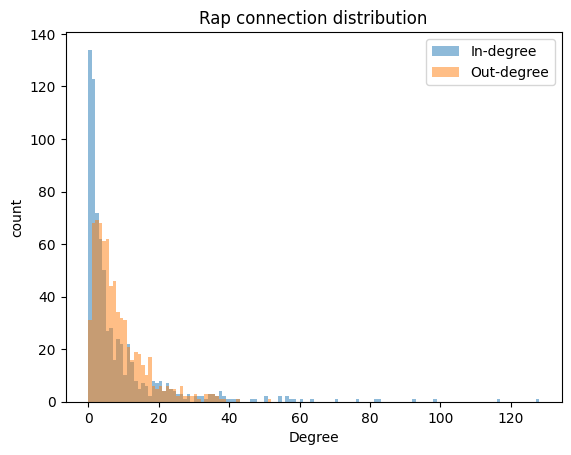

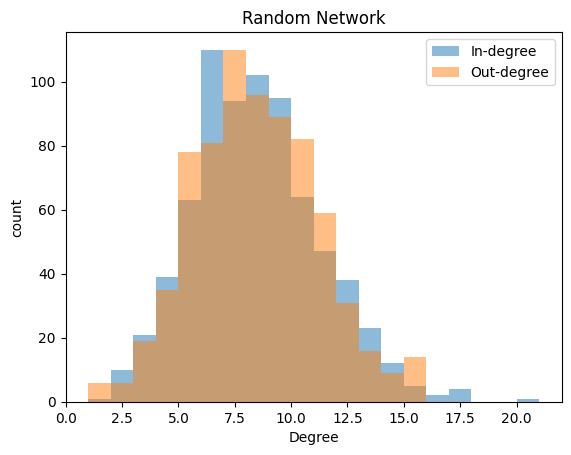

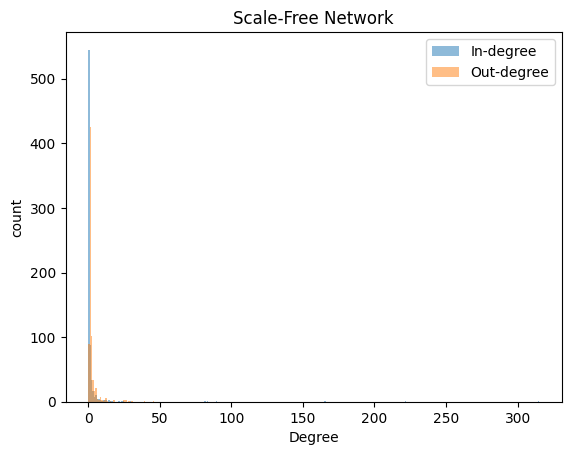

In [52]:
def plot_degree_distribution(G, title):
    in_degrees = [G.in_degree(n) for n in G.nodes()]
    out_degrees = [G.out_degree(n) for n in G.nodes()]

    plt.figure()
    plt.hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), alpha=0.5, label='In-degree')
    plt.hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), alpha=0.5, label='Out-degree')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('count')
    plt.legend()
    plt.show()

plot_degree_distribution(Rap_network, 'Rap connection distribution')

p = len(Rap_network.edges()) / (len(Rap_network.nodes()) * (len(Rap_network.nodes()) - 1))  
G_random = nx.erdos_renyi_graph(len(Rap_network.nodes()), p, directed=True)
plot_degree_distribution(G_random, 'Random Network')

G_scale_free = nx.scale_free_graph(len(Rap_network.nodes()))
plot_degree_distribution(G_scale_free, 'Scale-Free Network')


> * Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
> * Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?

In [53]:
def find_top_connected(graph, N, degree_type='in'):
    if degree_type == 'in':
        degrees = graph.in_degree()
    else:
        degrees = graph.out_degree()
    sorted_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)[:N]
    return sorted_degrees

# Top 10 most connected rappers (both in-degree and out-degree)
top_10_in = find_top_connected(Rap_network, 10, 'in')
top_10_out = find_top_connected(Rap_network, 10, 'out')
print(f"Top 10 most connected rappers by in-degree: {top_10_in}")
print(f"Top 10 most connected rappers by out-degree: {top_10_out}")

# Top 5 most connected West coast and East coast rappers
west_nodes = [n for n, attr in Rap_network.nodes(data=True) if attr.get('coast') == Coast.West_Coast]
east_nodes = [n for n, attr in Rap_network.nodes(data=True) if attr.get('coast') == Coast.East_Coast]

top_5_west_in = find_top_connected(Rap_network.subgraph(west_nodes), 5, 'in')
top_5_west_out = find_top_connected(Rap_network.subgraph(west_nodes), 5, 'out')
print(f"Top 5 most connected West coast rappers by in-degree: {top_5_west_in}")
print(f"Top 5 most connected West coast rappers by out-degree: {top_5_west_out}")

top_5_east_in = find_top_connected(Rap_network.subgraph(east_nodes), 5, 'in')
top_5_east_out = find_top_connected(Rap_network.subgraph(east_nodes), 5, 'out')
print(f"Top 5 most connected East coast rappers by in-degree: {top_5_east_in}")
print(f"Top 5 most connected East coast rappers by out-degree: {top_5_east_out}")

Top 10 most connected rappers by in-degree: [('Snoop Dogg', 128), ('Jay-Z', 116), ('Nas', 98), ('50 Cent', 92), ('Busta Rhymes', 82), ('Dr. Dre', 81), ('Kendrick Lamar', 76), ('Tupac Shakur', 70), ('The Notorious B.I.G.', 63), ('E-40', 60)]
Top 10 most connected rappers by out-degree: [('Drag-On', 52), ('Black Thought', 42), ('DJ Dahi', 38), ('The Game (rapper)', 37), ('Dr. Dre', 36), ('Kendrick Lamar', 36), ('Kurupt', 35), ('Jahlil Beats', 35), ('MC Lyte', 35), ('DJ Premier', 34)]
Top 5 most connected West coast rappers by in-degree: [('Snoop Dogg', 85), ('E-40', 52), ('Dr. Dre', 49), ('Kendrick Lamar', 47), ('Too Short', 35)]
Top 5 most connected West coast rappers by out-degree: [('DJ Dahi', 28), ('Kam (rapper)', 26), ('Suga Free', 22), ('JT the Bigga Figga', 22), ('RBX', 22)]
Top 5 most connected East coast rappers by in-degree: [('Jay-Z', 94), ('Nas', 76), ('Busta Rhymes', 69), ('50 Cent', 59), ('The Notorious B.I.G.', 49)]
Top 5 most connected East coast rappers by out-degree: [(

The results are as expected (except where is Eminem??) - So people with bigest in-degree are most popular rapper, In case of out degree we see rather nonpopular rappers (maybe thet added a lot of links to get fame?) an some more popular rappers (Maybe the have good page on wiki, or a lot of colaboration)

> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below:
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees.png?raw=true)
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees_loglog.png?raw=true)
